# Building a Sample of Good Brands

Input:
- all_brands_itemratingscount.csv

Output:
- all_good_brands.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. List of All 2017 Active Brands

Count of all-time ratings by brand from all brands with products active (at least 1 review) in 2017. Generated from this SQL script:

    SELECT brand, count(item_id) as number_of_items, sum(total_ratings) as all_ratings_count
    FROM active_product_total_ratings 
    GROUP BY brand
    ORDER BY brand, count(item_id) DESC

In [2]:
df = pd.read_csv('all_brands_itemratingscount.csv')
df.describe()

,number_of_items,all_ratings_count
count,29729.000000,29729.000000
mean,8.498604,104.574052
std,51.524121,922.882856
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,5.000000
75%,4.000000,25.000000
max,3237.000000,57584.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29729 entries, 0 to 29728
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              29727 non-null  object
 1   number_of_items    29729 non-null  int64 
 2   all_ratings_count  29729 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 696.9+ KB


In [4]:
df.head()

,brand,number_of_items,all_ratings_count
0,(Surround),1,2
1,!iT Jeans,4,8
2,#1 Consumers Choice,1,1
3,#1 TV COVER,2,2
4,'LG,1,33


# 1. Sample Only from Certain Brands

- more than 4 items (75th percentile)
- more than 100 ratings (88th percentile)

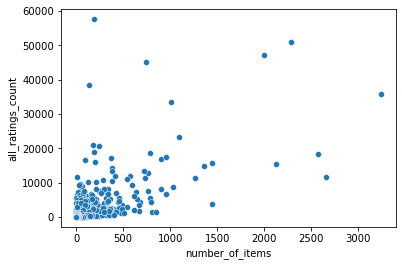

In [6]:
sns.scatterplot( x = df['number_of_items'], y = df['all_ratings_count'])
plt.show()

In [7]:
df['number_of_items'].quantile(0.75)

4.0

In [8]:
df['all_ratings_count'].quantile(0.75)

25.0

In [9]:
from scipy import stats

stats.percentileofscore(df['all_ratings_count'],100)

88.83077130075011

In [9]:
df_subset = df[(df['number_of_items']>4) & (df['all_ratings_count']>100)]
len(df_subset)

2694

In [10]:
df_subset.describe()

,number_of_items,all_ratings_count
count,2694.000000,2694.00000
mean,63.066815,965.51559
std,160.618092,2920.68194
min,5.000000,101.00000
25%,12.000000,168.00000
50%,25.000000,292.00000
75%,57.000000,694.50000
max,3237.000000,57584.00000


## 2.1 First Batch

- From online reviews here: https://www.androidcentral.com/amazon-banned-accessories-brands-and-alternatives

In [11]:
first = ['Comsoon', 'DOSS', 'JVC', 'Poweradd', 'UGREEN', 'Skullcandy', 'StarTech', 'Belkin', 'mophie', 'Native Union']

df_first = df_subset[df_subset['brand'].isin(first)]
df_first

,brand,number_of_items,all_ratings_count
3112,Belkin,767,12753
5531,Comsoon,9,224
6274,DOSS,14,237
12655,JVC,483,3582
16941,Native Union,28,131
19112,Poweradd,53,1357
22022,Skullcandy,264,7042
22668,StarTech,597,9341
24810,UGREEN,212,10109
29180,mophie,9,188


## 2.2 Random Sampling for More

In [13]:
chosen = df_subset.sample(n=175, replace=False, random_state=1)

# Export sampled data for manual checking
chosen.to_csv('initial_sample.csv')

In [30]:
# Excel with comments
tagged = pd.read_excel('initial_sample_tagged.xls')

In [31]:
to_remove = list(tagged['brand'][~tagged['removed'].isna()])

In [32]:
selected = chosen[~chosen['brand'].isin(to_remove)]
print(len(selected))
selected

101


,brand,number_of_items,all_ratings_count
28693,iFlash,19,126
19582,QualGear,19,1217
4581,CableJive,7,231
16409,Mopar,22,263
17857,Optimal Shop,33,334
...,...,...,...
6356,DTech,34,235
14832,LoveRPi,23,441
13096,KHOMO,59,1840
13374,Keen Eye,55,121


In [33]:
# For creation of SQL table
string =''
for i in list(selected['brand']):
    string += str.lower(i) + '|'
string

'iflash|qualgear|cablejive|mopar|optimal shop|coolead|vidpro|mfj|kinesis|caldigit|ezopower|nextec|lenovo|jabees|loctek|dxg|impecca|tera grand|1more|lenspen|ablegrid|tzumi|reshow|vakoo|optoma|benewy|gechic|bubm|tyt|avantree|zacro|yetor|suptek|jexon|jooan|cablegeeker|orico|enermax|vackoey|ancwear|weme|seagate|crucial|cisco|tenvis|powerextra|yamaha audio|elsse|kingston|tranesca|syncwire|gmyle|chuwi|mohoo|gw security inc|golf buddy|high sierra|cerwin-vega|ipazzport|evercool|hyperx|koolertron|ritz camera|tensun|lowpricenice|neutab|deego|litefuze|fitueyes|naxa electronics|power acoustik|vivo|macally|audioquest|elobeth|supersonic|sto-fen|mount factory|rcaw9|omnimount|eweton|phiaton|digitnow|syba|nuvur|sirui|nekteck|fospower|braven|solomark|totalmount|cryorig|engenius|steklo|juyoon|tokina|dtech|loverpi|khomo|keen eye|rnd|'

## 2.3 Summary of All Good Brands

In [34]:
# inital list

combined = pd.concat((df_first, selected), axis = 0)
len(combined)

111

In [35]:
combined

,brand,number_of_items,all_ratings_count
3112,Belkin,767,12753
5531,Comsoon,9,224
6274,DOSS,14,237
12655,JVC,483,3582
16941,Native Union,28,131
...,...,...,...
6356,DTech,34,235
14832,LoveRPi,23,441
13096,KHOMO,59,1840
13374,Keen Eye,55,121


In [36]:
combined.to_csv('all_good_brands.csv')